# Mean gene length vs. divergence time (My) 
**based on the protein coding gene length distributions for the different genomes**

## Import python modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import sys
sys.path.append('../../gl_lib/')
import gl_constants as c

/home/emuro/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Retrieving the data for the different groups of organisms

In [2]:
# data @
stat_file = c.SUPPL_TABLES_PATH + "gene_length_vs_divergence_time.tsv"
if 0:
    print("The data is in:\n", stat_file, "\n")

# retrieve data
stat_df = pd.read_csv(stat_file, low_memory=False, sep="\t", skiprows=1)
stat_df['Group of organisms'] = stat_df['Group of organisms'].replace(['Mammalia (except Primates)'], 'Mammalia')

# visualize data
if 1:
    print(stat_df.shape)
    display(stat_df)

(10, 5)


,Group of organisms,Divergence with human,Time from LUCA,<L>,<log L>
0,Archaea,3618.000000,82.000000,834.934335,6.496637
1,Bacteria,3618.000000,82.000000,942.983673,6.624111
2,Protists,1530.000000,2170.000000,2059.139453,7.219228
3,Fungi,1275.000000,2425.000000,1672.224559,7.179111
4,Viridiplantae,1530.000000,2170.000000,3555.716124,7.636548
5,Arthropoda,686.000000,3014.000000,7314.754165,7.931841
6,Actinopterygii,462.000000,3238.000000,18250.951600,8.979658
7,Aves,319.000000,3381.000000,27877.229130,9.283314
8,Mammalia,90.270588,3609.729412,45203.574250,9.519512
9,Primates,36.103846,3663.896154,48647.236850,9.509456


---
## Functions

In [3]:
def plot_single_scatter(df, col_x, col_y, x_lab, y_lab, l_hue, title, bool_show_regression): 
    sns.set_theme()
    fig, axs = plt.subplots(1, 1, figsize=(20, 4))
    fig.suptitle(title)
    axs.set(xlabel=x_lab, ylabel=y_lab) 
    g = sns.scatterplot(data=df, x=col_x, y=col_y, s=20, hue=l_hue, palette=c.COLOR_ORG_TIME_GROUPS, legend=True)
    if col_y == "<L>":   
        plt.yscale('log')
    
    plt.grid(True)      
    plt.legend(title=legends_by, fontsize='9', title_fontsize='14', \
        loc='lower right', borderaxespad=0)
    axs.set_xlim(0, 4000)
    
    if bool_show_regression:
        #Calculate best fit line
        slope, intercept, r_value, p_value, std_err = \
                stats.linregress(df[col_x], df[col_y])
        df["regr_y"] = slope * df[col_x] + intercept
        G0 = 6.14; MEAN_LOG_ZETA = 0.0008    
        df["theoretical_<log L>"] = G0 + MEAN_LOG_ZETA * df[col_x]
        if col_y == "<L>":   
            slope, intercept, r_value, p_value, std_err = \
                stats.linregress(df[col_x], np.log10(df[col_y]))
            df["regr_y"] = 10**(slope * df[col_x] + intercept)
            L0 = 498; MEAN_ZETA = 1.0011
            df["theoretical_<L>"] = L0 * np.exp( (MEAN_ZETA - 1) * df[col_x] )


        in_txt = '$R^{2}$ = ' + '{:2.4f}'.format(r_value**2)
        if 0:
            txt = 'intercept = ' + '{:4.2} '.format(10**intercept)  + ' \t ' +\
                     'slope =' + '{:4.3}'.format(slope) + ';\tR^{2} = ' + '{:2.2f}'.format(r_value**2)
            txt += '\ny = 10**(slope * X + intercept)'
        
        plt.text(0.05, 0.85, in_txt, #horizontalalignment='center', verticalalignment='center',\
                transform = axs.transAxes)
        plt.plot(df[col_x], df["regr_y"], c='deepskyblue', linewidth=2.) 
        if col_y == "<L>":   
            plt.plot(df[col_x], df["theoretical_<L>"], c='darkblue', linewidth=2., linestyle=(0, (1, 10)))   # loosely dotted linestyle
        else:
            plt.plot(df[col_x], df["theoretical_<log L>"], c='darkblue', linewidth=2., linestyle=(0, (1, 10)))  # loosely dotted linestyle

---

## Prepare the plot

In [4]:
df2plot = stat_df
title = "Protein coding genes"

col_x = "Time from LUCA"  
x_lab = "Time from LUCA (My)"  
legends_by = "Group of organisms"

bool_show_regression = True

## $\overline{<L>}$ or ${}$ $\overline{ < log L >}$ against divergence time from LUCA 
represented in $log$ (natural logarithm) scale

###  Average of $<L>$

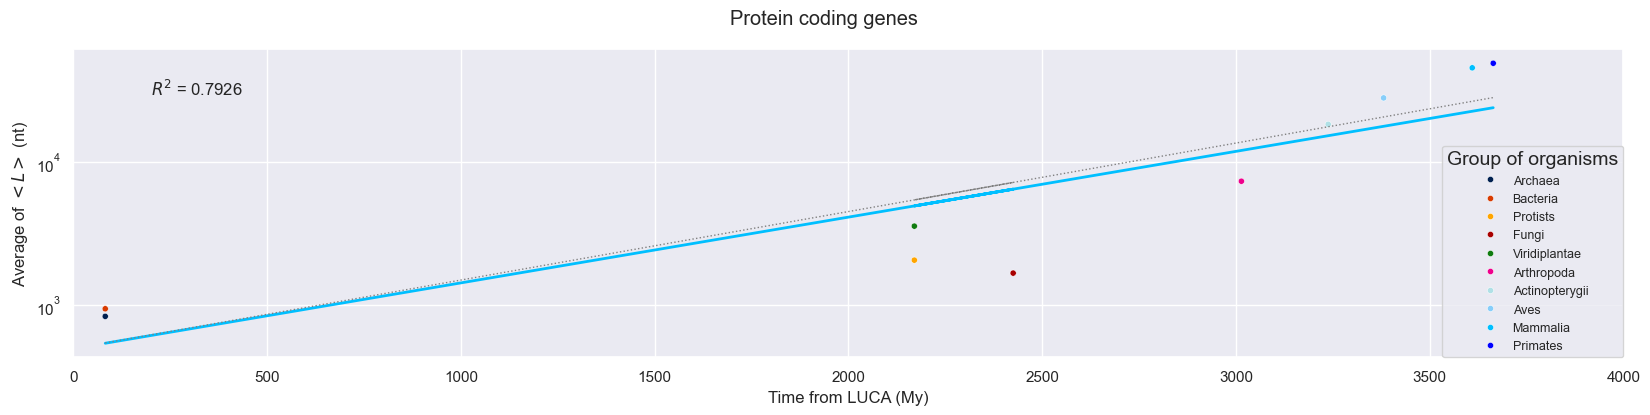

In [5]:
col_y = "<L>"  
y_lab = "Average of $<L>$ (nt)"
plot_single_scatter(df2plot, col_x, col_y, x_lab, y_lab, legends_by, title, bool_show_regression)

###  Average of $<log L>$

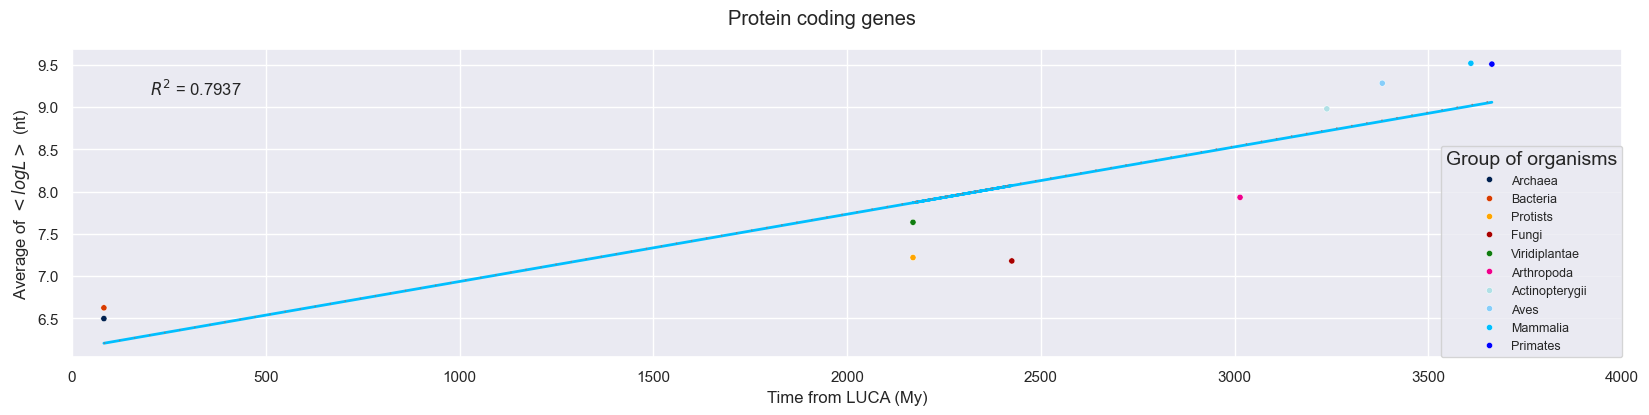

In [6]:
col_y = "<log L>"  
y_lab = "Average of $<log L>$ (nt)"
plot_single_scatter(df2plot, col_x, col_y, x_lab, y_lab, legends_by, title, bool_show_regression)